   Fold#  optimal_m  R_estimated  Test_error
0      1          5     0.355254    0.049080
1      2          5     0.048976    0.006766
2      3          3     0.009728    0.003159
3      4          1     0.070802    0.041817
4      5          4     0.131711    0.029494

Average R_estimated across folds: 0.1232941391985805
Average Test Error across folds: 0.026063013632859833


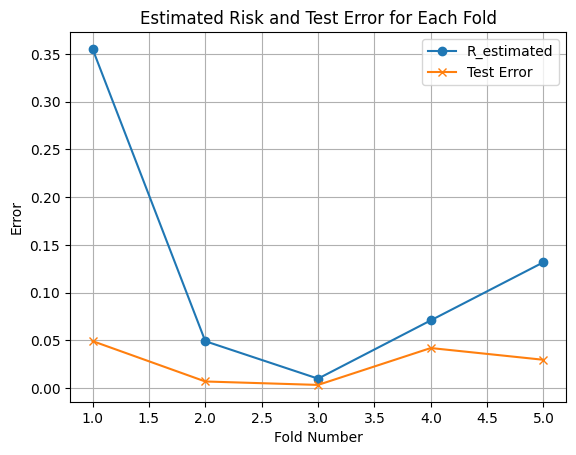

In [6]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def trig_poly(x, w, m):
    """Compute f_m(x, w) = w_0 + sum_i w_i * cos(2*pi*i*x) for i = 1 to m."""
    f = w[0]
    for i in range(1, m + 1):
        f += w[i] * np.cos(2 * np.pi * i * x)
    return f

def schwartz_criterion(p, n):
    """Compute the Schwartz criterion based on the given formula"""
    return 1 + p * (1 - p)**(-1) * np.log(n)

def sse(w, x, y, m):
    """Sum of squared errors (SSE)"""
    predictions = trig_poly(x, w, m)
    return np.sum((y - predictions) ** 2)

def empirical_risk(w, x, y, m):
    """Empirical risk calculated as mean squared error (MSE)"""
    predictions = trig_poly(x, w, m)
    mse = np.mean((y - predictions) ** 2)
    return mse

# 5-fold cross-validation with optimal m selection per fold
def cross_val_trig_poly(x, y, m_values, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    fold_results = []

    fold_number = 1
    
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        best_R_estimated = float('inf')
        best_m = None
        best_w_opt = None
        
        # Try different values of m to find the optimal one for this fold
        for m in m_values:
            w0 = np.random.randn(m + 1)
            
            result = minimize(sse, w0, args=(x_train, y_train, m), method='L-BFGS-B')
            w_opt = result.x
            
            # Calculate empirical risk (R_emp) on test set
            fold_error = empirical_risk(w_opt, x_test, y_test, m)
            
            # Compute estimated risk R_estimated
            R_emp = fold_error
            DoF = m + 1
            p = DoF / 8
            r_pn = schwartz_criterion(p, 8)
            R_estimated = r_pn * R_emp
            
            # Select the best model complexity based on minimum R_estimated
            if R_estimated < best_R_estimated:
                best_R_estimated = R_estimated
                best_m = m
                best_w_opt = w_opt

        # Compute test error for the best model in this fold
        test_error = empirical_risk(best_w_opt, x_test, y_test, best_m)
        
        # Append fold results
        fold_results.append((fold_number, best_m, best_R_estimated, test_error))
        fold_number += 1
    
    return pd.DataFrame(fold_results, columns=["Fold#", "optimal_m", "R_estimated", "Test_error"])

# Model complexities to evaluate
m_values = range(1, 7)

# Generate random example data
np.random.seed(33)
n = 10
x = np.random.uniform(0, 1, n)
noise = np.random.normal(0, 0.5, n)
y = x**2 + 0.1*x + noise

# Perform 5-fold cross-validation
df_fold_results = cross_val_trig_poly(x, y, m_values)
print(df_fold_results)

# Compute average R_estimated and test error across all folds
avg_R_estimated = df_fold_results['R_estimated'].mean()
avg_test_error = df_fold_results['Test_error'].mean()

print(f"\nAverage R_estimated across folds: {avg_R_estimated}")
print(f"Average Test Error across folds: {avg_test_error}")

# Plot the results
plt.plot(df_fold_results['Fold#'], df_fold_results['R_estimated'], marker='o', label="R_estimated")
plt.plot(df_fold_results['Fold#'], df_fold_results['Test_error'], marker='x', label="Test Error")
plt.xlabel('Fold Number')
plt.ylabel('Error')
plt.title('Estimated Risk and Test Error for Each Fold')
plt.legend()
plt.grid(True)
plt.show()

   Fold#  optimal_m  R_estimated  Test_error
0      1          1     0.258508    0.152679
1      2          1     0.266981    0.157683
2      3          1     0.811470    0.479267
3      4          4     0.004685    0.001049
4      5          1     0.064401    0.038036

Average R_estimated across folds: 0.2812089429564295
Average Test Error across folds: 0.16574295226119523


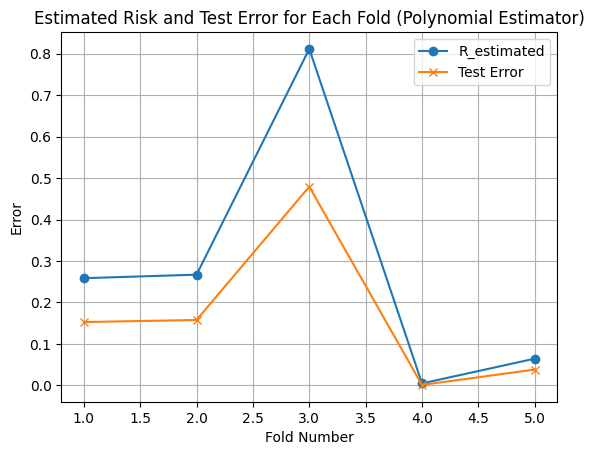

In [11]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Polynomial Estimator (Algebraic polynomial)
def poly_estimator(x, w, m):
    """Compute f_m(x, w) = w_0 + w_1*x + w_2*x^2 + ... + w_m*x^m for a polynomial of degree m."""
    return sum(w[i] * x**i for i in range(m + 1))

def schwartz_criterion(p, n):
    """Compute the Schwartz criterion based on the given formula."""
    return 1 + p * (1 - p)**(-1) * np.log(n)

def sse(w, x, y, m):
    """Sum of squared errors (SSE)."""
    predictions = poly_estimator(x, w, m)
    return np.sum((y - predictions) ** 2)

def empirical_risk(w, x, y, m):
    """Empirical risk calculated as mean squared error (MSE)."""
    predictions = poly_estimator(x, w, m)
    mse = np.mean((y - predictions) ** 2)
    return mse

# 5-fold cross-validation with optimal m selection per fold
def cross_val_poly(x, y, m_values, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    fold_results = []

    fold_number = 1
    
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        best_R_estimated = float('inf')
        best_m = None
        best_w_opt = None
        
        # Try different values of m to find the optimal one for this fold
        for m in m_values:
            w0 = np.random.randn(m + 1)
            
            result = minimize(sse, w0, args=(x_train, y_train, m), method='L-BFGS-B')
            w_opt = result.x
            
            # Calculate empirical risk (R_emp) on test set
            fold_error = empirical_risk(w_opt, x_test, y_test, m)
            
            # Compute estimated risk R_estimated
            R_emp = fold_error
            DoF = m + 1
            p = DoF / 8
            r_pn = schwartz_criterion(p, 8)
            R_estimated = r_pn * R_emp
            
            # Select the best model complexity based on minimum R_estimated
            if R_estimated < best_R_estimated:
                best_R_estimated = R_estimated
                best_m = m
                best_w_opt = w_opt

        # Compute test error for the best model in this fold
        test_error = empirical_risk(best_w_opt, x_test, y_test, best_m)
        
        # Append fold results
        fold_results.append((fold_number, best_m, best_R_estimated, test_error))
        fold_number += 1
    
    return pd.DataFrame(fold_results, columns=["Fold#", "optimal_m", "R_estimated", "Test_error"])

# Model complexities to evaluate
m_values = range(1, 7)

# Generate random example data
np.random.seed(42)
n = 10
x = np.random.uniform(0, 1, n)
noise = np.random.normal(0, 0.5, n)
y = x**2 + 0.1*x + noise

# Perform 5-fold cross-validation
df_fold_results = cross_val_poly(x, y, m_values)
print(df_fold_results)

# Compute average R_estimated and test error across all folds
avg_R_estimated = df_fold_results['R_estimated'].mean()
avg_test_error = df_fold_results['Test_error'].mean()

print(f"\nAverage R_estimated across folds: {avg_R_estimated}")
print(f"Average Test Error across folds: {avg_test_error}")

# Plot the results
plt.plot(df_fold_results['Fold#'], df_fold_results['R_estimated'], marker='o', label="R_estimated")
plt.plot(df_fold_results['Fold#'], df_fold_results['Test_error'], marker='x', label="Test Error")
plt.xlabel('Fold Number')
plt.ylabel('Error')
plt.title('Estimated Risk and Test Error for Each Fold (Polynomial Estimator)')
plt.legend()
plt.grid(True)
plt.show()